# Liste des caractéristiques

- Courage
- Kindness
- Lucidity
- Intelligence
- Creativity
- Loyalty
- Cold blood
- Sincerity
- Ambition
- Wisdom

In [1]:
import pandas as pd
import numpy as np
import os
from random import shuffle
from matplotlib import pyplot as plt

In [9]:
os.makedirs("DATA_TP_FINAL",exist_ok=True)
os.makedirs("DATA_TP_FINAL/data_vis/",exist_ok=True)
os.makedirs("DATA_TP_FINAL/data_app/",exist_ok=True)
os.makedirs("DATA_TP_FINAL/data_dec/",exist_ok=True)

In [3]:
N = 800
min_rate = 0
max_rate = 10
qualities = ['Courage','Kindness','Lucidity','Intelligence','Creativity','Loyalty','Cold blood','Sincerity','Ambition','Wisdom']
houses = ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]

In [16]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

vars1 = []
vars2 = []
nums = 30
for d in range(1,nums+1):
    var1=0
    var2=0
    while var1==var2:
        var1 = np.random.randint(2)
        var2 = np.random.randint(8)+2
    data = {q:None for q in qualities}
    centers = [[np.random.uniform(3,4),np.random.uniform(3,4)],
               [np.random.uniform(6,7),np.random.uniform(3,4)],
               [np.random.uniform(3,4),np.random.uniform(6,7)],
               [np.random.uniform(6,7),np.random.uniform(6,7)]]
    std = np.random.random((4))*0.25+0.75
    shuffle(houses)
    data_app_vars = {h:[] for h in houses}
    data_dec_vars = {h:[] for h in houses}
    for i,house,center in zip(range(4),houses,centers):
        data_app_var1 = np.clip(np.random.normal(center[0],std[i],size=(N//4)),0,10)
        data_app_var2 = np.clip(np.random.normal(center[1],std[i],size=(N//4)),0,10)
        data_dec_var1 = np.clip(np.random.normal(center[0],std[i],size=(N//4)),0,10)
        data_dec_var2 = np.clip(np.random.normal(center[1],std[i],size=(N//4)),0,10)

        data_app_vars[house] = [NormalizeData(np.random.normal(size=(N//4)))*10 for q in qualities]
        data_app_vars[house][var1] = data_app_var1
        data_app_vars[house][var2] = data_app_var2

        data_dec_vars[house] = [NormalizeData(np.random.normal(size=(N//4)))*10 for q in qualities]
        data_dec_vars[house][var1] = data_dec_var1
        data_dec_vars[house][var2] = data_dec_var2

    colors = {'Gryffindor':'red',
             'Slytherin':'green',
             'Ravenclaw':'blue',
             'Hufflepuff':'orange'}

    plt.subplots(2,2,figsize=(20,20))
    plt.subplot(221)
    plt.axis((-0.5,10.5,-0.5,10.5))
    for h in houses:
        plt.scatter(data_app_vars[h][0],data_app_vars[h][1],c=colors[h],label=h)
    plt.legend()
    plt.title("APP - 0 & 1")
    plt.xlabel(qualities[0])
    plt.ylabel(qualities[1])
    plt.subplot(222)
    plt.axis((-0.5,10.5,-0.5,10.5))
    for h in houses:
        plt.scatter(data_dec_vars[h][0],data_dec_vars[h][1],c=colors[h],label=h)
    plt.legend()
    plt.title("DEC - 0 & 1")
    plt.xlabel(qualities[0])
    plt.ylabel(qualities[1])
    plt.subplot(223)
    plt.axis((-0.5,10.5,-0.5,10.5))
    for h in houses:
        plt.scatter(data_app_vars[h][var1],data_app_vars[h][var2],c=colors[h],label=h)
    plt.legend()
    plt.title("APP - var1 & var2")
    plt.xlabel(qualities[var1])
    plt.ylabel(qualities[var2])
    plt.subplot(224)
    plt.axis((-0.5,10.5,-0.5,10.5))
    for h in houses:
        plt.scatter(data_dec_vars[h][var1],data_dec_vars[h][var2],c=colors[h],label=h)
    plt.legend()
    plt.title("DEC - var1 & var2")
    plt.xlabel(qualities[var1])
    plt.ylabel(qualities[var2])
    plt.savefig(f'DATA_TP_FINAL/data_vis/data_vis_{d}.png')
    plt.close()

    # MERGE DATA_VARS
    data_app_vars = {h:[np.array([h]*len(data_app_vars[h][0]))]+data_app_vars[h] for h in houses}
    data_app_merge = np.concatenate([np.stack(data_app_vars[h]) for h in data_app_vars.keys()],axis=1)
    data_dec_vars = {h:[np.array([h]*len(data_dec_vars[h][0]))]+data_dec_vars[h] for h in houses}
    data_dec_merge = np.concatenate([np.stack(data_dec_vars[h]) for h in data_dec_vars.keys()],axis=1)

    data_app = pd.DataFrame(data_app_merge.T,columns=['House']+qualities, index = range(N))
    data_dec = pd.DataFrame(data_dec_merge.T,columns=['House']+qualities, index = range(N))

    data_app.to_csv(f'DATA_TP_FINAL/data_app/data_app_{d}.csv',sep='\t',index=False)
    data_dec.to_csv(f'DATA_TP_FINAL/data_dec/data_dec_{d}.csv',sep='\t',index=False)
    
    vars1.append(var1)
    vars2.append(var2)
    
print([qualities[v] for v in vars1])
print([qualities[v] for v in vars2])

all_vars = pd.DataFrame(index = range(1,nums+1),columns=['var1','var2','qual1','qual2'])
all_vars['var1'] = vars1
all_vars['var2'] = vars2
all_vars['qual1'] = [qualities[v] for v in vars1]
all_vars['qual2'] = [qualities[v] for v in vars2]
all_vars.to_csv('DATA_TP_FINAL/vars.csv',sep='\t',index=False)
all_vars

['Courage', 'Courage', 'Courage', 'Courage', 'Courage', 'Courage', 'Courage', 'Courage', 'Courage', 'Kindness', 'Kindness', 'Kindness', 'Courage', 'Kindness', 'Courage', 'Kindness', 'Kindness', 'Kindness', 'Courage', 'Kindness', 'Kindness', 'Courage', 'Courage', 'Courage', 'Courage', 'Kindness', 'Kindness', 'Kindness', 'Courage', 'Courage']
['Ambition', 'Intelligence', 'Loyalty', 'Wisdom', 'Wisdom', 'Intelligence', 'Sincerity', 'Cold blood', 'Wisdom', 'Intelligence', 'Sincerity', 'Cold blood', 'Wisdom', 'Loyalty', 'Intelligence', 'Creativity', 'Cold blood', 'Ambition', 'Lucidity', 'Ambition', 'Ambition', 'Creativity', 'Intelligence', 'Lucidity', 'Wisdom', 'Lucidity', 'Creativity', 'Sincerity', 'Ambition', 'Ambition']


,var1,var2,qual1,qual2
1,0,8,Courage,Ambition
2,0,3,Courage,Intelligence
3,0,5,Courage,Loyalty
4,0,9,Courage,Wisdom
5,0,9,Courage,Wisdom
6,0,3,Courage,Intelligence
7,0,7,Courage,Sincerity
8,0,6,Courage,Cold blood
9,0,9,Courage,Wisdom
10,1,3,Kindness,Intelligence


In [12]:
# Fonction pour séparer les données en fonction des différents labels de classe
def split_data(data,label_col):
    labels = list(np.unique(data[label_col]))
    return labels, [data[data[label_col]==l] for l in labels]

# Séparetion des données app et dec
labels_app, data_labels_app = split_data(data_app,"House")
labels_dec, data_labels_dec = split_data(data_dec,"House")

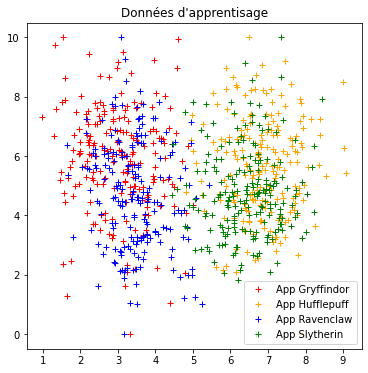

In [13]:
colors = {'App Gryffindor':'red',
         'App Slytherin':'green',
         'App Ravenclaw':'blue',
         'App Hufflepuff':'orange'}

def plot_2_var(labels,all_x,all_y,titre=None,colors=None):
    # Ici, labels, all_x et all_y sont des listes de même taille
    plt.figure(figsize=(6,6))
    for label,x,y in zip(labels,all_x,all_y):
        plt.plot(x,y,'+',label=label,c=colors[label])
    plt.legend()
    plt.title(titre)
    plt.show()
    
# Affichage des données d'apprentissages
app_labels = [f"App {l}" for l in labels_app]
app_x = [d['Courage'].astype(float) for d in data_labels_app]
app_y = [d['Kindness'].astype(float) for d in data_labels_app]
plot_2_var(app_labels,app_x,app_y,"Données d'apprentisage",colors)

VALEURS A ENREGISTRER POUR LA CORRECTION :
VAR1
VAR2
SCORES CLASSIFIEUR 0 ET 1 (POUR CHAQUE CLASSIFIEUR, LES 3 METRIQUES)
SCORES CLASSIFIEUR VAR1 ET VAR2 (POUR CHAQUE CLASSIFIEUR, LES 3 METRIQUES)
PREDICTION POINT A PREDIRE